## Roll Length Model Demo - Level 2 Jupyter "Procedure Functions" Code Style
* if caliper and diameter of a roll-wound substrate are known from previous measurements, the model can calculate roll length. This is useful industrially to know how many linear meters remain on a roll and thereby be able to calculate parameters like roll weight and run time
* In a second use case, the model can fit experimental length versus diameter data to calculate the substrate's effective caliper while wound on the roll
* This example uses an "organized Jupyter notebook" approach of putting actions in Python functions
</br></br>
JDL / DataDelve LLC, July 2023


In [1]:
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
"""
=========================================================================
Unit Conversions Used by Model
=========================================================================
"""
d_unit_conv = {'mm_m':1000., 
               'g_kg':1000., 
               's_min':60}

#### Calculate Roll Length from Diameter

In [3]:
"""
=========================================================================
CalculateRollLength Procedure -  Length calculation given caliper, diam 
and diam_core inputs. 

All inputs in units of mm. length output in meters
=========================================================================
"""
def CalculateRollLength(d_unit_conv, diam_roll, diam_core, caliper):
    """
    Calculate roll length in meters
    diam_roll, diam_core and caliper: [float] inputs in mm units
    Caliper measured by Thwing Albert single layer test method (042361-27)
    
    JDL 7/7/23
    """
    mm_m = d_unit_conv['mm_m']
    
    numerator = math.pi * ((diam_roll / mm_m) ** 2 - (diam_core / mm_m) ** 2)
    denom = (4 * (caliper / mm_m))
    length = round(numerator / denom, 1)
    return length

In [4]:
#test calculation
f"roll length is {CalculateRollLength(d_unit_conv, 1500, 150, 0.2)} m"

'roll length is 8747.4 m'

#### Fit raw data to calculate effective caliper
Fitting data for a roll of in-market toilet paper
<p align="center">
  Test roll</br>
  <img src=Session4_0_IMG_3850.jpeg "non-transformed raw data" width=200></br>
</p>

A plot of L versus Diam^2 should be linear with slope and intercept related to caliper

In [5]:
"""
=========================================================================
CaliperFromRawData Procedure
=========================================================================
"""
#=========================================================================
def CaliperFromRawData(file_raw):
    """
    Multi-step procedure to calculate caliper by fitting Length vs Diam^2 data
    JDL 7/7/23
    """
    df_raw = ReadRawData(file_raw)
    df_raw = AddCalculatedRawCols(df_raw)
    slope, intercept, R_squared = FitRawData(df_raw)
    caliper = CalculateCaliper(slope)
    return caliper, df_raw, R_squared

#=========================================================================

def ReadRawData(file_raw):
    """
    Import the raw data to Pandas DataFrame
    """
    return pd.read_excel(file_raw)

def AddCalculatedRawCols(df_raw):
    """
    Add Calculated columns for diam in meters and diam_m squared
    """
    df_raw['diam_m'] = df_raw['diameter'] / 1000
    df_raw['diam_m^2'] = df_raw['diam_m'] ** 2
    return df_raw

def FitRawData(df_raw):
    """
    Calculate slope, intercept, and R-squared attributes for 
    raw data linear fit
    JDL 4/27/23
    """

    X = df_raw['diam_m^2'].values.reshape(-1, 1)
    y = df_raw['length'].values

    # Fit the data using scikit-learn LinearRegression
    reg = LinearRegression()
    reg.fit(X, y)

    # Set the attributes
    slope = reg.coef_[0]
    intercept = reg.intercept_
    R_squared = round(reg.score(X, y), 4)
    return slope, intercept, R_squared

def CalculateCaliper(slope):
    """
    Calculate the caliper attribute from the slope and convert to millimeters.
    Round the caliper to 4 decimal places.
    """

    # Calculate caliper using the formula: caliper = pi / (4 * slope)
    caliper = math.pi / (4 * slope)

    # Convert caliper to millimeters and round
    caliper *= 1000
    caliper = round(caliper, 4)
    return caliper

In [6]:
df_raw = ReadRawData('cushiony_tp_length_vs_diam.xlsx')

In [7]:
caliper, df_raw, R_squared = CaliperFromRawData('cushiony_tp_length_vs_diam.xlsx')
print(f"Caliper for these data is {caliper} mm")
print(f"R^2 from the L vs D^2 fit is {R_squared}")

Caliper for these data is 0.4804 mm
R^2 from the L vs D^2 fit is 0.9985


In [10]:
"""
=========================================================================
Plot raw and transformed data
=========================================================================
"""
def XYDataPlot(X, Y, x_label, y_label, plot_title):
    """
    XY Plot of raw and transformed data
    """
    plt.scatter(X, Y)
    plt.xlabel(x_label), plt.ylabel(y_label)
    plt.title(plot_title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

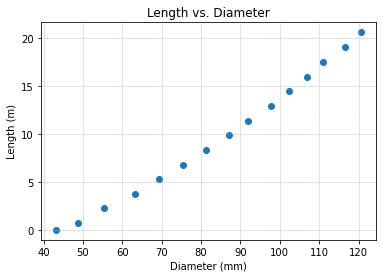

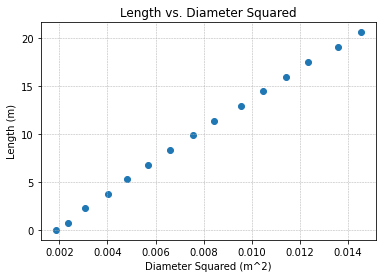

In [11]:
XYDataPlot(df_raw['diameter'], df_raw['length'], 'Diameter (mm)', 'Length (m)', 'Length vs. Diameter') 
XYDataPlot(df_raw['diam_m^2'], df_raw['length'], 'Diameter Squared (m^2)', 'Length (m)', 'Length vs. Diameter Squared') 